In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

# Analysis of the autonomous communities

In [2]:
path="Dataset\\datos_Comunidad_autonoma.csv"

In [3]:
data=pd.read_csv(path)

In [4]:
data.head()

,ccaa_iso,fecha,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida
0,AN,2020-01-31,0,0,0,0,0
1,AR,2020-01-31,0,0,0,0,0
2,AS,2020-01-31,0,0,0,0,0
3,CB,2020-01-31,0,0,0,0,0
4,CE,2020-01-31,0,0,0,0,0


In [5]:
#Shape of the DataFrame
data.shape

(3515, 7)

In [6]:
#Type of data
data.dtypes

ccaa_iso                        object
fecha                           object
num_casos                        int64
num_casos_prueba_pcr             int64
num_casos_prueba_test_ac         int64
num_casos_prueba_otras           int64
num_casos_prueba_desconocida     int64
dtype: object

In [7]:
# Summary of column characteristics
data.describe()

,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida
count,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000
mean,92.850356,81.038122,5.943670,0.502134,5.366430
std,248.449708,237.473596,22.012187,3.817654,36.423082
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000
50%,11.000000,9.000000,0.000000,0.000000,0.000000
75%,71.000000,53.000000,0.000000,0.000000,0.000000
max,3112.000000,3107.000000,286.000000,72.000000,612.000000


In [8]:
#Total number of confirmed cases
data["num_casos"].sum()

326369

In [9]:
#Acronyms of the Autonomous Communities analyzed
data["ccaa_iso"].unique()

array(['AN', 'AR', 'AS', 'CB', 'CE', 'CL', 'CM', 'CN', 'CT', 'EX', 'GA',
       'IB', 'MC', 'MD', 'ML', 'NC', 'PV', 'RI', 'VC'], dtype=object)

In [10]:
#number of Autonomous Cominities + Ceuta and Melilla
len(data["ccaa_iso"].unique().tolist())

19

In [11]:
#Dictionary with the name of the autonomous communities, number of inhabitants and population density
CA_Dict1={
    'AN':["ANDALUCIA",8414240,96.05],
    'AR':["ARAGÓN",1319291,27.65],
    'AS':["PRINCIPADO DE ASTURIAS",1022800,96.45],
    'CB':["CANTABRIA",581078,109.20],
    'CE':["CEUTA",84777,4238.85],
    'CL':["CASTILLA Y LEÓN",2399548,25,47],
    'CM':["CASTILLA-LA MANCHA",2032863,25.58],
    'CN':["CANARIAS",2153389,289,16],
    'CT':["CATALUÑA",7675217,239.01],
    'EX':["EXTREMADURA",1067710,25.65],
    'GA':["GALICIA",2699499,91.28],
    'IB':["ISLAS BALEARES",1149460,230.26],
    'MC':["COMUNIDAD DE MURCIA",1493898,132.04],
    'MD':["COMUNIDAD DE MADRID",6663394,830.02],
    'ML':["MELILLA",86487,7207.25],
    'NC':["COMUNIDAD DE NAVARRA",654214,62.96],
    'PV':["PAÍS VASCO",2207776,305.19],
    'RI':["LA RIOJA",316798,62.79],
    'VC':["COMUNIDAD DE VALENCIA",5003769,215.17]
}

# data visualization

In [12]:
#First transform date to format datetime
data["fecha"]=pd.to_datetime(data["fecha"])

In [13]:
data.dtypes

ccaa_iso                                object
fecha                           datetime64[ns]
num_casos                                int64
num_casos_prueba_pcr                     int64
num_casos_prueba_test_ac                 int64
num_casos_prueba_otras                   int64
num_casos_prueba_desconocida             int64
dtype: object

### First at all, the data of the 4 communities with the most population will be displayed

In [14]:
#funtion for comparing autonomous communities 4 by 4
def comparing_autonomous_comunities(comunidades_T):
    n=len(comunidades_T)
    if n<=4:
        dim=[2,2]
        fig, axs = plt.subplots(dim[0], dim[1], sharex=False,constrained_layout=True)
        a=0
        b=0
        for i in comunidades_T:
            x=data[data["ccaa_iso"]==i]["fecha"]
            y=data[data["ccaa_iso"]==i]["num_casos"]
            x_dias=np.arange(len(y))
            m=len(y)
            list1=np.ones(m)
            y_mean=list1*int(y.mean())
            if i=="AN":
                c="g"
            elif i=="CT":
                c="y"
            elif i=="MD":
                c="b"
            elif i=="VC":
                c="black"
            else:
                c="b"

            axs[a][b].plot(x_dias,y,c,x_dias,y_mean,'r--')    
            axs[a][b].set_title(CA_Dict1[i][0]+" ("+ str((y.sum()))+")",fontsize=11)
            axs[0][0].set_ylabel('confirmed cases', fontsize=12)
            axs[1][0].set_ylabel('confirmed cases', fontsize=12)
            axs[1][0].set_xlabel('number of days', fontsize=12)
            axs[1][1].set_xlabel('number of days', fontsize=12)
            ##
            if (a==b and a==0) or (b>a and b!=dim[1]-1):
                b+=1
            elif b==dim[1]-1 and a!=dim[0]-1:
                b=0
                a+=1
            elif a==dim[0]-1:
                b+=1
        fig.tight_layout()
    else:
        print("Introduce less than 4 autonomous communities")
    return plt.show()

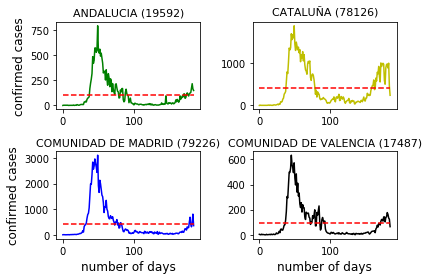

In [15]:
comparing_autonomous_comunities(["AN","CT","MD","VC"])

In [16]:
#analysis of the four communities together but it's possible to introduce the the number of communities that you want
#["CM","CL","AR",'AN','AS','CB','CE','CN','CT','EX', 'GA','IB','MD','ML','NC','PV','RI','VC']
def analysis_together(comunidades):
    for i in comunidades:
        x=data[data["ccaa_iso"]==i]["fecha"]
        y=data[data["ccaa_iso"]==i]["num_casos"]
        if i=="AN":
            c=["g","ANDALUCIA ({})".format(int(y.mean()))]
        elif i=="CT":
            c=["y","CATALUÑA ({})".format(int(y.mean()))]
        elif i== "MD":
            c=["b","MADRID ({})".format(int(y.mean()))]
        elif i=="VC":
            c=["black","VALENCIA ({})".format(int(y.mean()))]
        else:
            c=["gray",CA_Dict1[i][0]+" ("+ str(int(y.mean()))+")"]

        plt.plot(x,y,c[0],label=c[1])
        plt.legend()
        plt.xlabel("date")
        plt.ylabel("confirmed cases")
        plt.title("Evolution of the pandemic in autonomous communities")
    return plt.show()

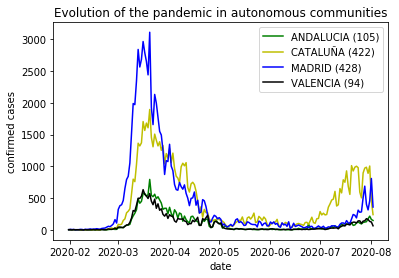

In [17]:
analysis_together(["AN","CT","MD","VC"])

In [18]:
#analysis of the number of inhabitants, population density and number of total confirmed cases
#It's possible analysis all the communities that is available at the same time
#["CM","CL","AR",'AN','AS','CB','CE','CN','CT','EX', 'GA','IB','MD','ML','NC','PV','RI','VC']
def analysis_factors(comunidades_T):
    fig, axs = plt.subplots(1,3,squeeze=False,constrained_layout=False,figsize=(16,5))
    fig.set_facecolor("#f1f7ec")
    for i in comunidades_T:

        if i=="AN":
            c="g"
        elif i=="CT":
            c="y"
        elif i== "MD":
            c="b"
        elif i=="VC":
            c="gray"
        else:
            c="black"
        y=(data[data["ccaa_iso"]==i]["num_casos"]).sum()
        axs[0][0].barh(CA_Dict1[i][0],CA_Dict1[i][1],color=c,edgecolor ='black' )    
        axs[0][0].set_title("Population",fontsize=15)
        axs[0][1].barh(CA_Dict1[i][0],CA_Dict1[i][2],color=c,edgecolor ='black' )
        axs[0][1].set_title("Population Density",fontsize=15)
        axs[0][2].barh(CA_Dict1[i][0],y,color=c, edgecolor ='black')
        axs[0][2].set_title("Total Confirmed Cases",fontsize=15)

    fig.tight_layout()
    return plt.show()


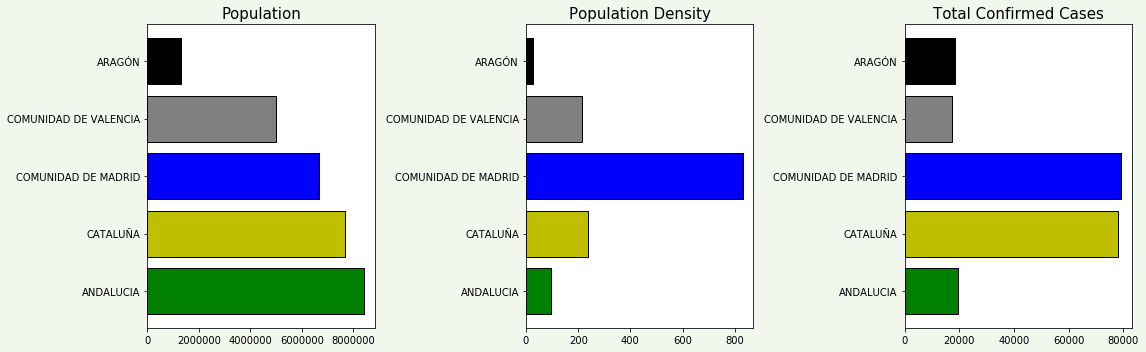

In [19]:
analysis_factors(["AN","CT","MD","VC","AR"])